# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
# keras.datasets.fashion_mnist


In [3]:
dataset = keras.datasets.fashion_mnist
dataset.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
len(dataset.load_data()[0])

2

In [5]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [8]:
X_train.shape[0]

60000

In [9]:
X_test.shape[0]

10000

In [10]:
X_train.shape[1] * X_train.shape[2]

784

In [11]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

In [12]:
pd.Series(y_test).value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
Name: count, dtype: int64

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

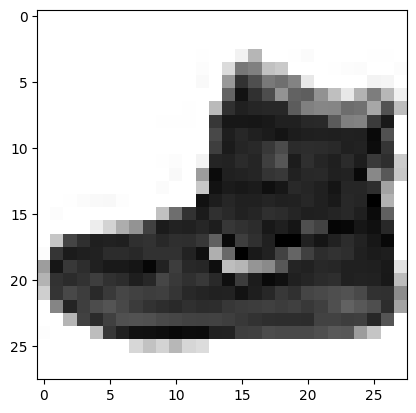

In [14]:
plt.imshow(X_train[0], cmap="binary")

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [15]:
X_train.min()

np.uint8(0)

In [16]:
X_train.max()

np.uint8(255)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train.min()

np.float64(0.0)

In [19]:
X_train.max()

np.float64(1.0)

Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

In [20]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

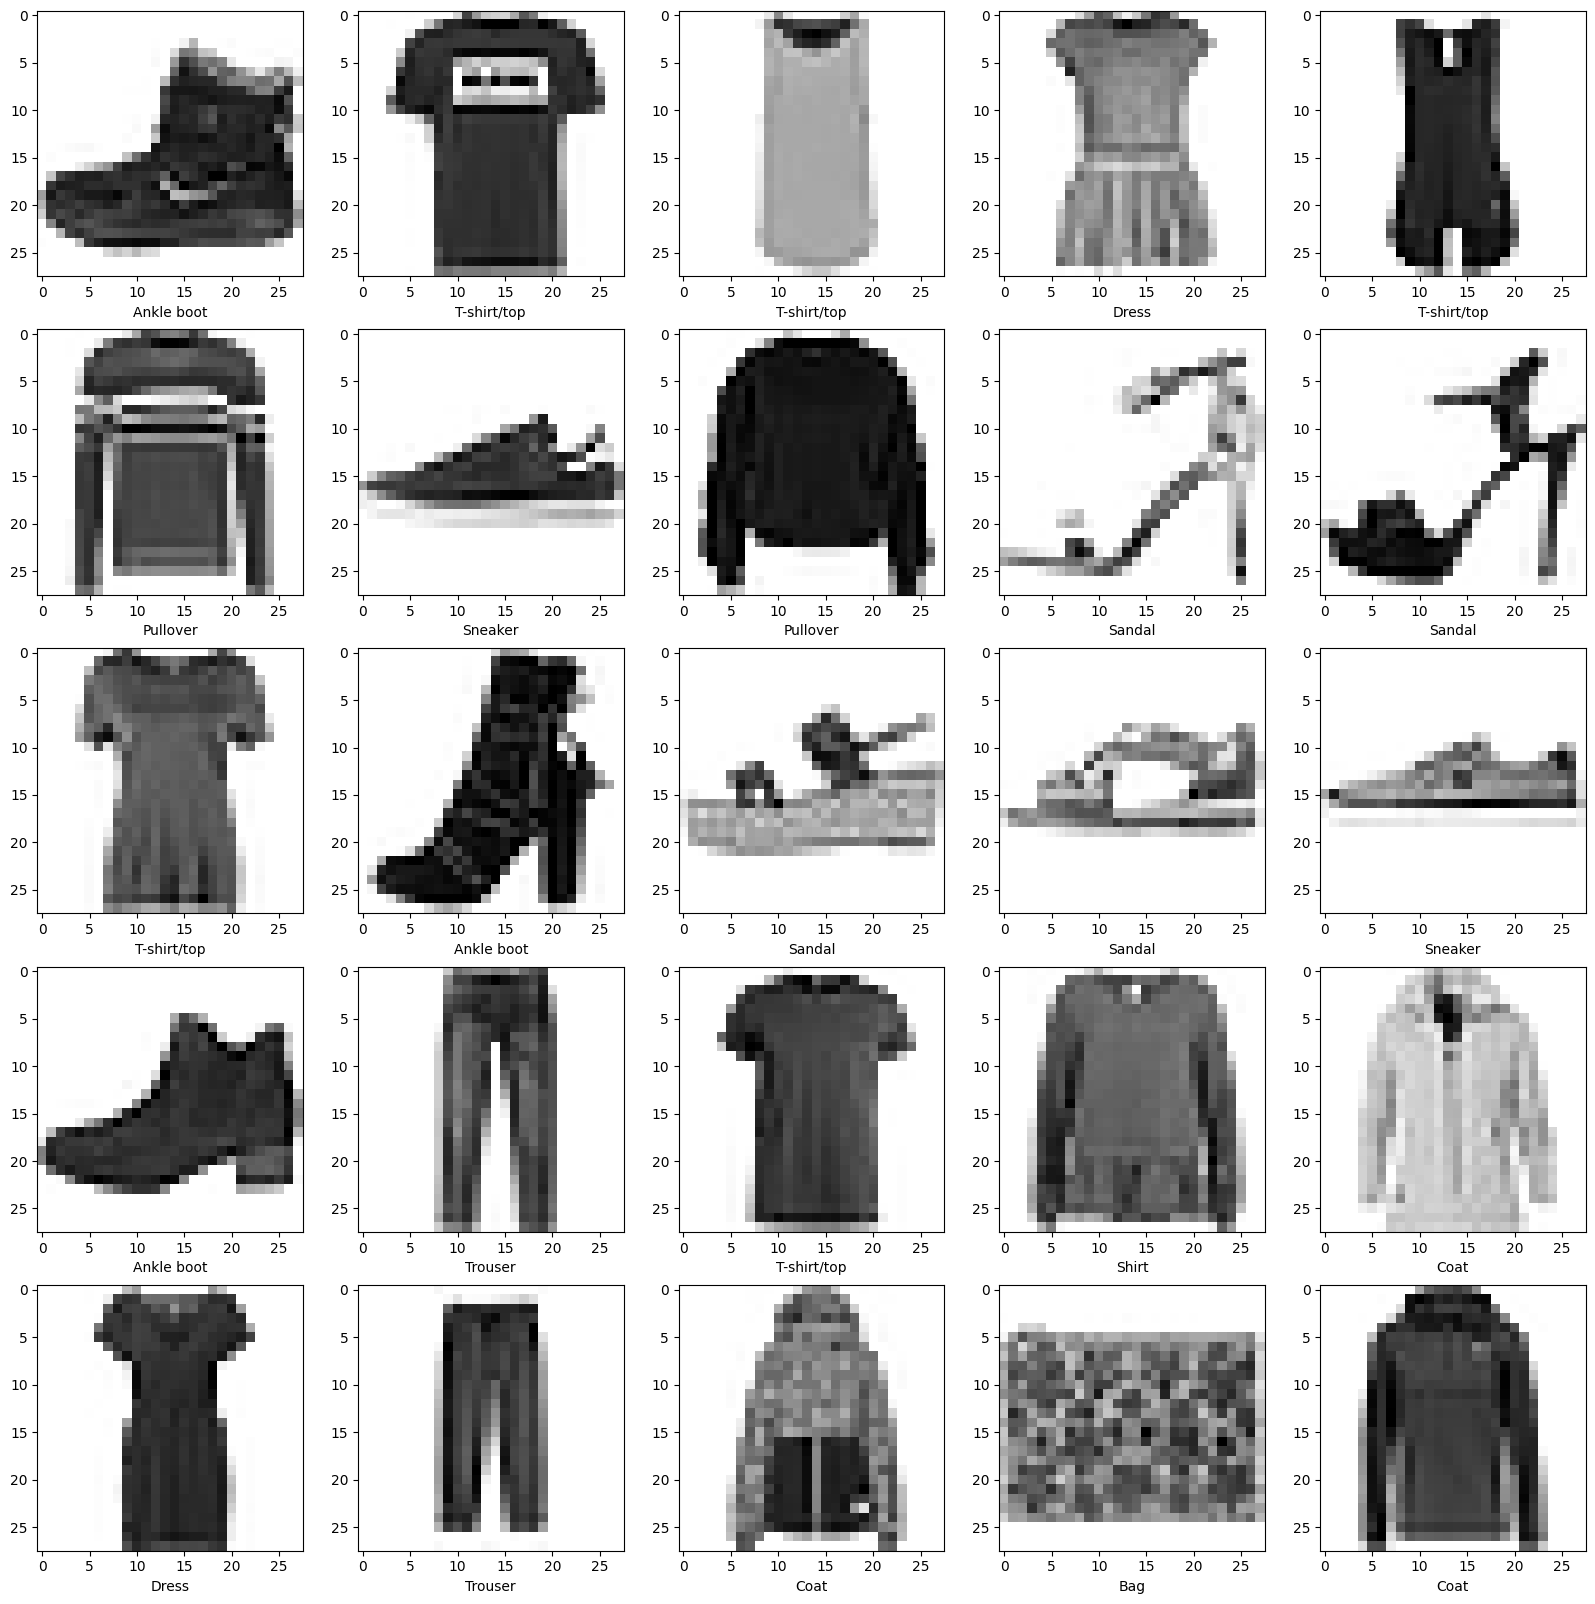

In [21]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i], cmap="binary")
    plt.xlabel(class_names[y_train[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256),
    keras.layers.Dense(128),
    keras.layers.Dense(32),
    keras.layers.Dense(10, activation="softmax")
])

C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [23]:
model.compile(optimizer="sgd",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
784 * 256 + 256

200960

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [26]:
len(X_train)*0.9/32

1687.5

In [27]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7267 - loss: 0.7942 - val_accuracy: 0.8280 - val_loss: 0.4894
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8310 - loss: 0.4893 - val_accuracy: 0.8128 - val_loss: 0.5053
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8393 - loss: 0.4582 - val_accuracy: 0.8428 - val_loss: 0.4466
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8475 - loss: 0.4387 - val_accuracy: 0.8455 - val_loss: 0.4363
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8463 - loss: 0.4323 - val_accuracy: 0.8423 - val_loss: 0.4413
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8544 - loss: 0.4254 - val_accuracy: 0.8505 - val_loss: 0.4256
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8539 - loss: 0.4201 - val_accuracy: 0.8375 - val_loss: 0.4400
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8533 - loss: 0.4206 - 

<Axes: >

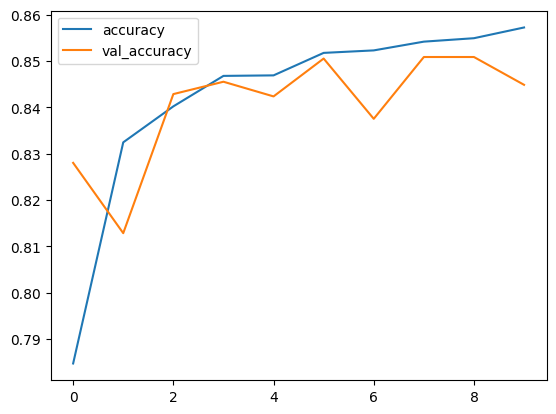

In [28]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

In [29]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.4527
test loss, test acc: [0.45995059609413147, 0.8389999866485596]


In [30]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256),
    keras.layers.Dense(256),
    keras.layers.Dense(64),
    keras.layers.Dense(10, activation="softmax")
])

model_2.compile(optimizer="sgd",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])


C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
history_2 = model_2.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7420 - loss: 0.7650 - val_accuracy: 0.8197 - val_loss: 0.5033
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8318 - loss: 0.4790 - val_accuracy: 0.8373 - val_loss: 0.4543
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8402 - loss: 0.4550 - val_accuracy: 0.8408 - val_loss: 0.4496
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8482 - loss: 0.4391 - val_accuracy: 0.8348 - val_loss: 0.4678
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8485 - loss: 0.4338 - val_accuracy: 0.8492 - val_loss: 0.4220
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8535 - loss: 0.4208 - val_accuracy: 0.8430 - val_loss: 0.4411
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8505 - loss: 0.4178 - val_accuracy: 0.8525 - val_loss: 0.4200
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8603 - loss: 0.4059 - 

<Axes: >

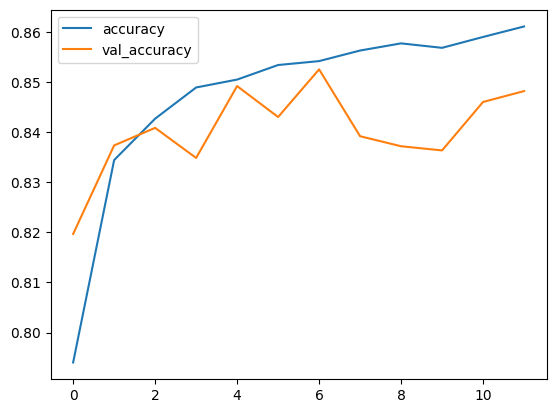

In [32]:
pd.DataFrame(history_2.history)[['accuracy', 'val_accuracy']].plot()

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [33]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.4527


[0.45995059609413147, 0.8389999866485596]

In [34]:
model_2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8451 - loss: 0.4570


[0.4648299217224121, 0.8413000106811523]

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [35]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step


array([[2.1590931e-07, 1.1680481e-09, 1.5954695e-06, ..., 8.3864734e-02,
        1.6292252e-03, 7.5597960e-01],
       [1.2252886e-04, 9.5288549e-08, 9.8416877e-01, ..., 1.5832570e-13,
        5.9182153e-06, 1.8320829e-13],
       [1.5267306e-05, 9.9995708e-01, 6.6542630e-06, ..., 5.5031649e-11,
        2.9919267e-08, 6.7958584e-13],
       ...,
       [1.4546363e-01, 8.3330451e-07, 4.5417491e-03, ..., 3.6095120e-05,
        3.6529043e-01, 1.0528854e-06],
       [1.3181126e-06, 9.9978048e-01, 1.4282675e-06, ..., 4.6933646e-08,
        3.1456377e-08, 3.0319292e-08],
       [3.8868922e-05, 6.1713768e-06, 1.5239771e-04, ..., 1.2130430e-02,
        3.7933432e-03, 2.9111127e-04]], dtype=float32)

In [36]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([9, 2, 1, ..., 6, 1, 5])

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [37]:
y_pred[0]

array([2.1590931e-07, 1.1680481e-09, 1.5954695e-06, 6.2469951e-07,
       9.1270050e-07, 1.5851663e-01, 6.4237297e-06, 8.3864734e-02,
       1.6292252e-03, 7.5597960e-01], dtype=float32)

In [38]:
y_pred_labels[0]

np.int64(9)

In [39]:
class_names[y_pred_labels[0]]

'Ankle boot'

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

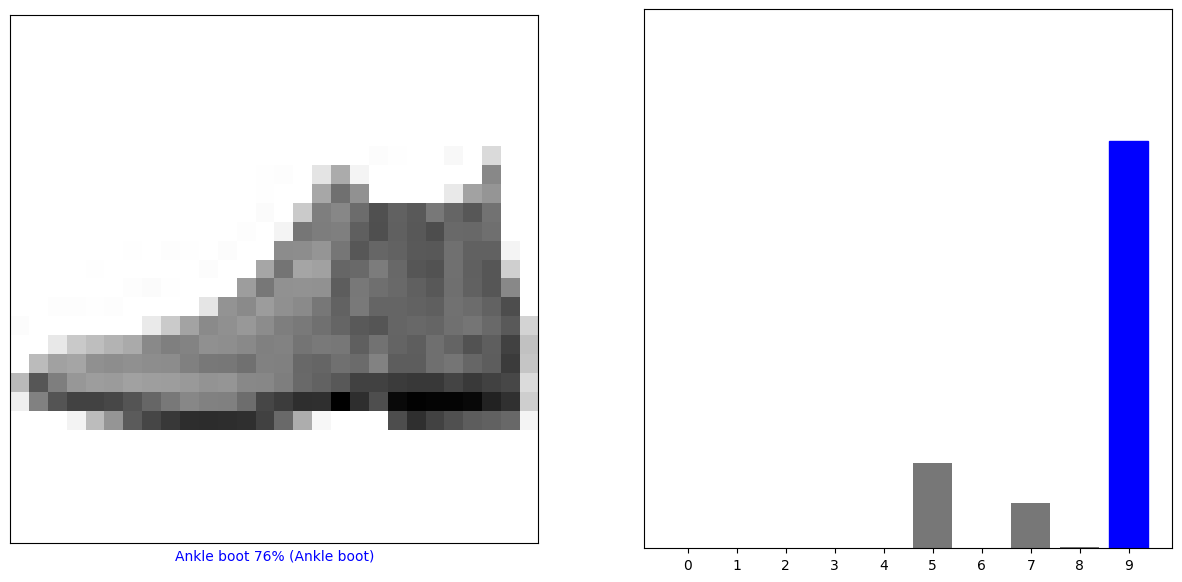

In [41]:
i = 0
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i], y_test)

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

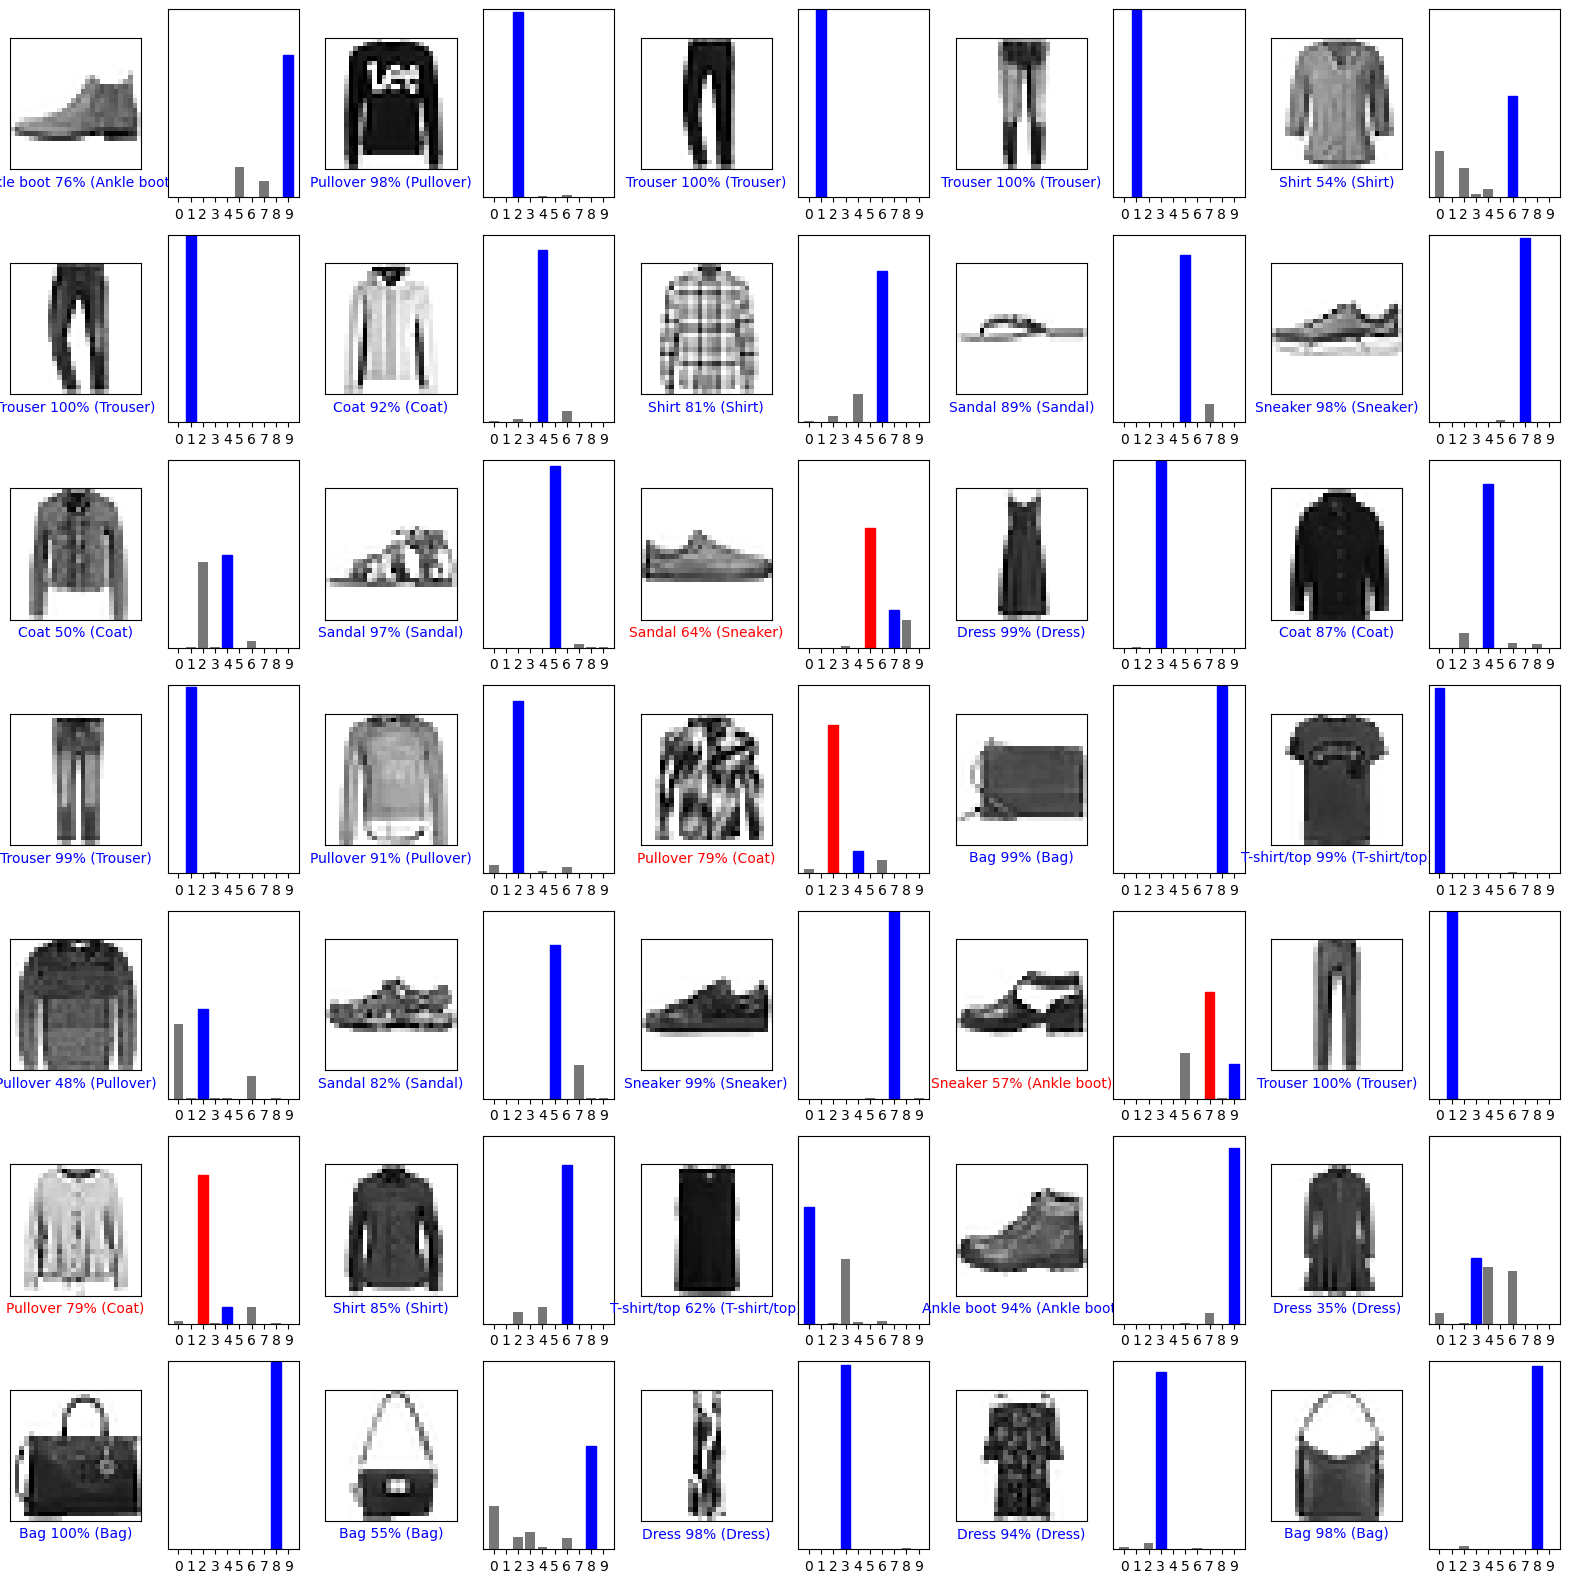

In [42]:
n_rows = 7
n_cols = 5
n_img = n_rows * n_cols

plt.figure(figsize=(20,20))

for i in range(n_img):
    # plt.figure(figsize=(15,7))
    plt.subplot(n_rows, n_cols*2, 2*i + 1)
    plot_image(i, y_pred[i], y_test, X_test)
    plt.subplot(n_rows, n_cols*2, 2*i + 2)
    plot_value_array(i, y_pred[i], y_test)

Evalúa tu modelo con una matriz de confusión e interprétala.

<Axes: >

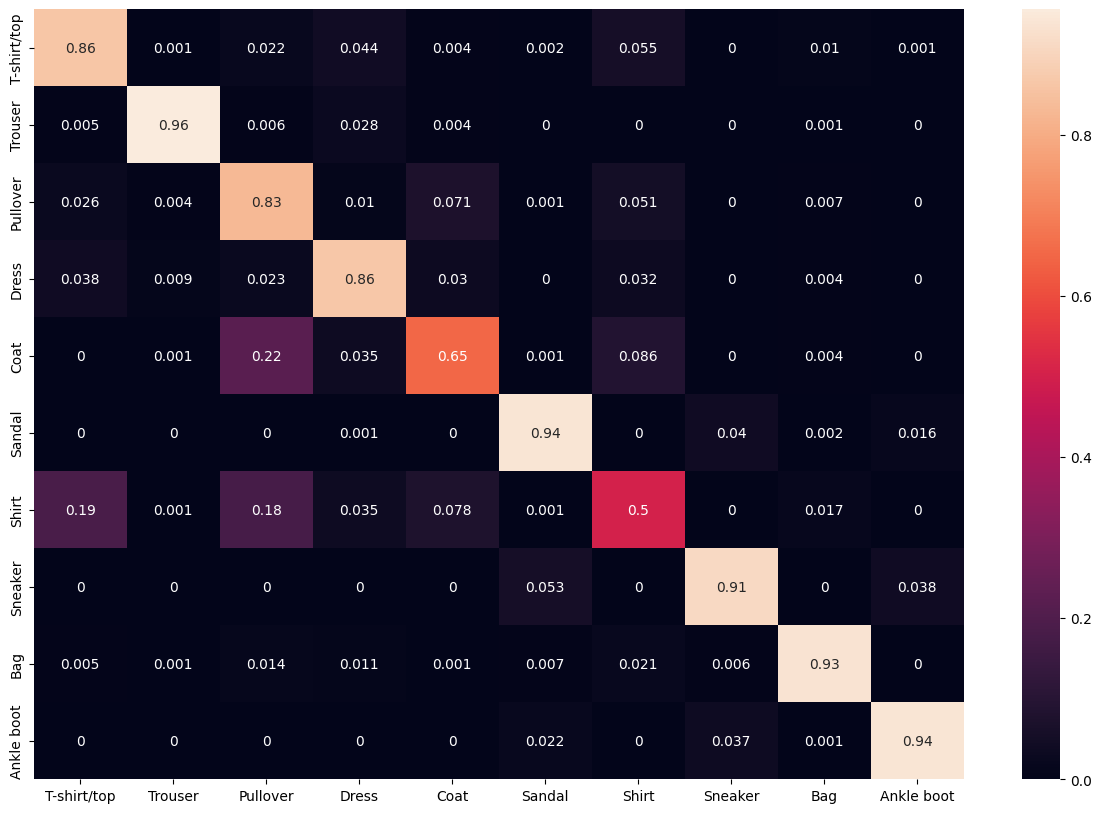

In [43]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, y_pred_labels, normalize='true')
plt.figure(figsize=(15,10))
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.64      0.83      0.72      1000
           3       0.84      0.86      0.85      1000
           4       0.78      0.65      0.71      1000
           5       0.92      0.94      0.93      1000
           6       0.67      0.50      0.58      1000
           7       0.92      0.91      0.91      1000
           8       0.95      0.93      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [45]:
class_names[np.argmax(model_2.predict(X_test[112:113]))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


'Sneaker'